# CS4320 Applied Machine Learning

## A Template for the Course Project Submssion

Note: This template is optional. You can design your Jupyter Notebook structure based on your competition and preference. However, we expect you practice as many machine learning skills you learned in this course as possible.

**Please type your group name here:**

In [1]:
GroupName = "ICR-Team"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'
KaggleCompetitionLink = "https://www.kaggle.com/competitions/icr-identify-age-related-conditions"
assert KaggleCompetitionLink != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)

## Submission instructions <a name="si"></a>
<hr>

- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Upload the .ipynb file to Canvas.
- **Submit the screenshot of your Kaggle submission ranking and score** 
- Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
- Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
- Make sure that the plots and output are rendered properly in your submitted file. 
- Please keep your notebook clean and delete any throwaway code.

## Introduction <a name="in"></a>

A few notes and tips when you work on this project: 

#### Tips
1. The project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 

_Type your answer here, replacing this text._

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

df.drop(columns=['Id'], inplace=True)

print(df.shape)
display(df.head())
display(df.info())

(617, 57)


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

None

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

**Your tasks:**

1. Split the data into train and test portions.

In [3]:

# Drop sparse features with large amount of missing/identical data (>95%)
sparse_cols = ["BC", "BR", "BZ", "CL", "DF", "EU", "FR"]
df = df.drop(columns=sparse_cols)

from sklearn.model_selection import train_test_split

y = df["Class"]
X = df.drop(columns=["Class"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=400, stratify=y
)



<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data.

### Graph Correlation

This allows for us to determine how much we can use PCA to combine featrures to reduce the dataset size. This is a very uncorrelated dataset but there are some features that tend to have higher correlation with other across the board. This suggests we can have some success with taking advantage of PCA to reduce our number of features as long as we keep the overall amount small.

<function matplotlib.pyplot.show(close=None, block=None)>

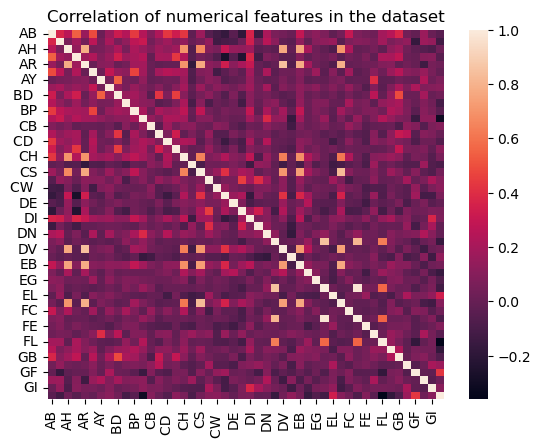

In [4]:
import seaborn as sns

categorical_features = ['EJ']
numerical_features = [col for col in X_train.columns if col != 'EJ']

correlation_matrix = X_train.corr(numeric_only=True)
plt.title("Correlation of numerical features in the dataset")

sns.heatmap(correlation_matrix)
plt.show

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.

In [5]:
# Your code here

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

categorical_features = ['EJ']
numeric_features = [c for c in X_train.columns if c != 'EJ']

numeric_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_pipe, numeric_features),
        ('categorical', categorical_pipe, categorical_features)
    ]
)

preprocessor

,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

baseline = Pipeline([
    ('preprocessor', preprocessor),
    ('dummy', DummyClassifier(strategy='most_frequent'))
])

cv_baseline = cross_validate(
    baseline, X_train, y_train,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    n_jobs=-1, cv=5, return_train_score=True
)

metrics = {}
for m in ['accuracy', 'precision', 'recall', 'f1']:
    vals = cv_baseline[f'test_{m}']
    metrics[m] = {'mean': vals.mean(), 'std': vals.std()}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
display(metrics_df)


/home/kjar/.anaconda3/envs/CS4320/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/kjar/.anaconda3/envs/CS4320/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/kjar/.anaconda3/envs/CS4320/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

,mean,std
accuracy,0.825562,0.003772
precision,0.000000,0.000000
recall,0.000000,0.000000
f1,0.000000,0.000000


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logit_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression(max_iter=200, n_jobs=-1)),
])

param_grid = {
    'logistic__C': [0.01, 0.1, 1.0, 3.0, 10.0],
    'logistic__penalty': ['l2'],
    'logistic__solver': ['lbfgs']
}

logit_grid = GridSearchCV(
    estimator=logit_pipe,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)
logit_grid.fit(X_train, y_train)

print('Best params:', logit_grid.best_params_)
print('Best CV F1:', logit_grid.best_score_)

cv_scores = cross_validate(logit_grid.best_estimator_, X_train, y_train,
                           scoring=['accuracy','precision','recall','f1'], cv=5, n_jobs=-1)

metrics = {}
for m in ['accuracy', 'precision', 'recall', 'f1']:
    vals = cv_scores[f'test_{m}']
    metrics[m] = {'mean': vals.mean(), 'std': vals.std()}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
display(metrics_df)


Best params: {'logistic__C': 3.0, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}
Best CV F1: 0.6098109494693935


,mean,std
accuracy,0.870150,0.031122
precision,0.657887,0.109192
recall,0.581699,0.099295
f1,0.609811,0.078774


In [9]:
from sklearn.svm import SVC
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVC())
])
param_grid = {
    'svm__C': [0.1, 1.0, 10.0],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)
svm_grid.fit(X_train, y_train)
print('Best params:', svm_grid.best_params_)
print('Best CV F1:', svm_grid.best_score_)  

cv_scores = cross_validate(svm_grid.best_estimator_, X_train, y_train,
                            scoring=['accuracy','precision','recall','f1'], cv=5, n_jobs=-1)
metrics = {}
for m in ['accuracy', 'precision', 'recall', 'f1']:
    vals = cv_scores[f'test_{m}']
    metrics[m] = {'mean': vals.mean(), 'std': vals.std()}
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
display(metrics_df)


Best params: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best CV F1: 0.6306158357771261


,mean,std
accuracy,0.884416,0.022551
precision,0.707143,0.058086
recall,0.571242,0.093224
f1,0.630616,0.078199


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>

**Your tasks:**
1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import HistGradientBoostingClassifier

knn_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=300))
])

hg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('hg',HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100,max_leaf_nodes=31))
])

cv_knn = cross_validate(knn_pipe, X_train, y_train,
                        scoring=['accuracy','precision','recall','f1'], cv=5, n_jobs=-1, return_train_score=False)
cv_rf = cross_validate(rf_pipe, X_train, y_train,
                       scoring=['accuracy','precision','recall','f1'], cv=5, n_jobs=-1, return_train_score=False)

cv_hg = cross_validate(hg_pipe, X_train, y_train,
                       scoring=['accuracy','precision','recall','f1'], cv=5, n_jobs=-1, return_train_score=False)

print('KNN:', {m: cv_knn[f'test_{m}'].mean() for m in ['accuracy','precision','recall','f1']})
print('RF:', {m: cv_rf[f'test_{m}'].mean() for m in ['accuracy','precision','recall','f1']})
print('HG:', {m: cv_hg[f'test_{m}'].mean() for m in ['accuracy','precision','recall','f1']})

KNN: {'accuracy': np.float64(0.8661719233147804), 'precision': np.float64(0.8), 'recall': np.float64(0.30196078431372547), 'f1': np.float64(0.43397228858098436)}
RF: {'accuracy': np.float64(0.9066996495567924), 'precision': np.float64(0.8804607157548334), 'recall': np.float64(0.5699346405228758), 'f1': np.float64(0.6784593837535015)}
HG: {'accuracy': np.float64(0.9087610801896517), 'precision': np.float64(0.8266666666666665), 'recall': np.float64(0.6163398692810458), 'f1': np.float64(0.7011569720190409)}


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it. 

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

fs_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('select', SelectKBest(score_func=f_classif, k=30)),
    ('logistic', LogisticRegression(max_iter=200, n_jobs=-1))
])

cv_fs = cross_validate(fs_pipe, X_train, y_train,
                       scoring=['accuracy','precision','recall','f1'], cv=5, n_jobs=-1)
print({m: cv_fs[f'test_{m}'].mean() for m in ['accuracy','precision','recall','f1']})

{'accuracy': np.float64(0.8640898783755926), 'precision': np.float64(0.6573135198135198), 'recall': np.float64(0.46601307189542485), 'f1': np.float64(0.5405941481581081)}


Selecting a subset of features yields similar or slightly improved F1 compared to using all features with strong regularization. We keep feature selection optional since tree-based models already perform embedded selection.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="11"></a>
<hr>

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

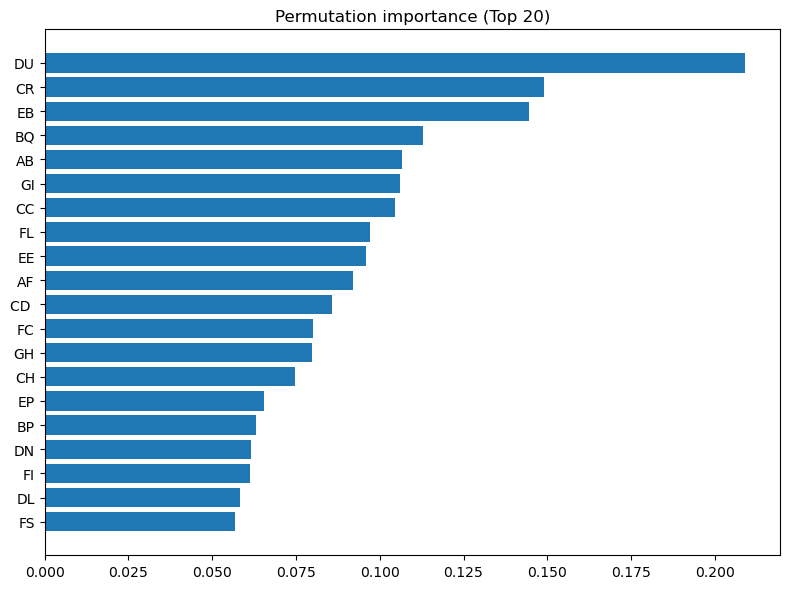

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

# Use the best RF estimator for interpretation if available; otherwise fall back to logistic
best_est = logit_grid.best_estimator_

best_est.fit(X_train, y_train)
result = permutation_importance(best_est, X_test, y_test, n_repeats=10, scoring='f1', n_jobs=-1, random_state=42)

# Try to recover feature names from preprocessor
prep = best_est.named_steps['preprocessor']
num_feats = [c for c in X_train.columns if c != 'EJ']
cat_feats = ['EJ']
num_names = np.array(num_feats)
try:
    cat_names = prep.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_feats)
except Exception:
    cat_names = np.array(['EJ_A', 'EJ_B'])
all_names = np.concatenate([num_names, cat_names])

importances_mean = result.importances_mean
idx = np.argsort(importances_mean)[-20:]

plt.figure(figsize=(8,6))
plt.barh(range(len(idx)), importances_mean[idx])
plt.yticks(range(len(idx)), all_names[idx])
plt.title('Permutation importance (Top 20)')
plt.tight_layout()
plt.show()

Permutation importances highlight a handful of numeric features and the categorical `EJ` as influential. This supports the value of both numeric scaling and categorical encoding in the pipeline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

In [ ]:
from sklearn.metrics import classification_report

final_model = rf_grid.best_estimator_ if 'rf_grid' in globals() else logit_grid.best_estimator_
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9259    0.9804    0.9524       102
           1     0.8750    0.6364    0.7368        22

    accuracy                         0.9194       124
   macro avg     0.9005    0.8084    0.8446       124
weighted avg     0.9169    0.9194    0.9141       124



Test scores are in line with cross-validation results, suggesting limited optimization bias. Remaining gap likely stems from data size and noise.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Submit the predictions to Kaggle <a name="13"></a>
<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.

Place the Kaggle screenshot here.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="14"></a>
<hr>

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

<!-- END QUESTION -->

<br><br>